# CS207 Systems Development Final Project: 

## Automatic Differentiation package
## TopCoderKitty-ML

**Collaborators**: Tamilyn Chen, Kar-Tong Tan and Mark Lock

<hr style="height:2pt">

##  Introduction 

### Overview

Derivatives play an integral role in computational science, ranging from its use in gradient descent, Newton's method, to finding the posteriors of Bayesian models. We discuss numerical differentiation, symbolic differentiation, how both demonstrate limitations, and automatic differentiation, the focus of our software. We acknowledge its effectiveness in both its accuracy and efficiency when evaluating derivatives. Lastly, we provide some real life applications in population dynamics, biology, and politics. 

### Motivation for Automatic Differentiation

Because functions are often too complex to solve analytically, instead, we look to alternative methods that automatically calculate derivatives. There are three main ways to approach this issue: numerical differentiation from finding finite difference approximations, symbolic differentiation through expression manipulation, and automatic differentiation (AD or algorithmic differentiation). While numerical differentiation is easy to code, it is also subject to floating point errors; symbolic differentiation gives exact and accurate results, but is too computationally expensive. Thus, automatic differentiation proves to be the most effective method as it works to resolve both of these issues; AD is both exact/numerically stable and computationally efficient. 

## Background
### What is AD?
Conceptually straightforward, automatic differentiation can be defined as a family of techniques that evaluate the derivative through the use of elementary arithmetic operations (ie. addition, subtraction, etc.), elementary arithmetic functions (ie. exp, log, sin), and the chain rule. AD is a recursive process that involves repeatedly taking the chain rule to the elementary operations at hand, and allows us to calculate the individual components of the gradient (a list of partial derivatives in terms of each of the inputs) evaluations, to produce results that are automatic and precise. Because AD involves a specific family of techniques that compute derivatives through accumulation of values during code execution to generate numerical derivative evaluations rather than derivative expressions, it can attain machine precision. There are two modes in AD: the forward mode and reverse mode. 
### Forward Mode
The forward mode begins at the innermost portion of the function and repeatedly, or recursively, applies the chain rule while traversing out. Thus, the forward pass creates the evaluation trace, which is a composition of the finite set of elementary operations for which derivatives are known. This is then combined to evaluate the derivative of the overall composition. Notably, the derivative at subsequent steps are calculated based on the derivatives calculated in preceding steps. It is also important to note that the forward pass also finds the derivatives and the values of the partial derivatives at each step, thus requiring the setting of the seed vector, which indicates which input variable to the take the partial derivative in terms of. Taking the derivative of the m dependent output variables in terms of a single independent input variable make up one column of the jacobian matrix. Thus, the full jacobian matrix can be defined as the partial derivative of the m output variables in terms of the n input variables, or applying the forward pass across n evaluations. These recursive steps can be documented in a table, and visually represented through a computational graph.
Below is a simple example of the forward mode, which includes the table and graph:

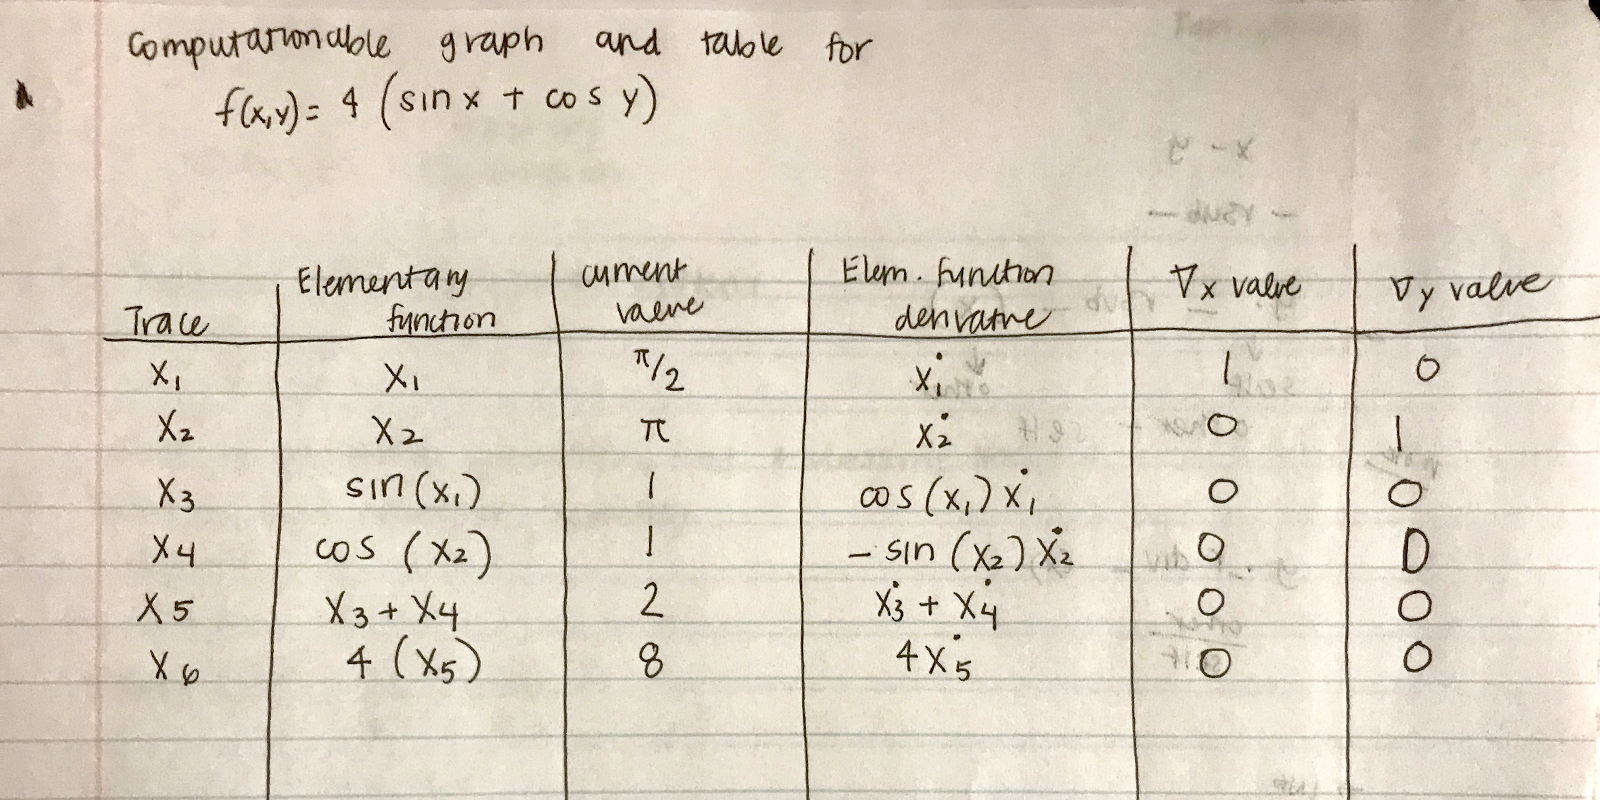
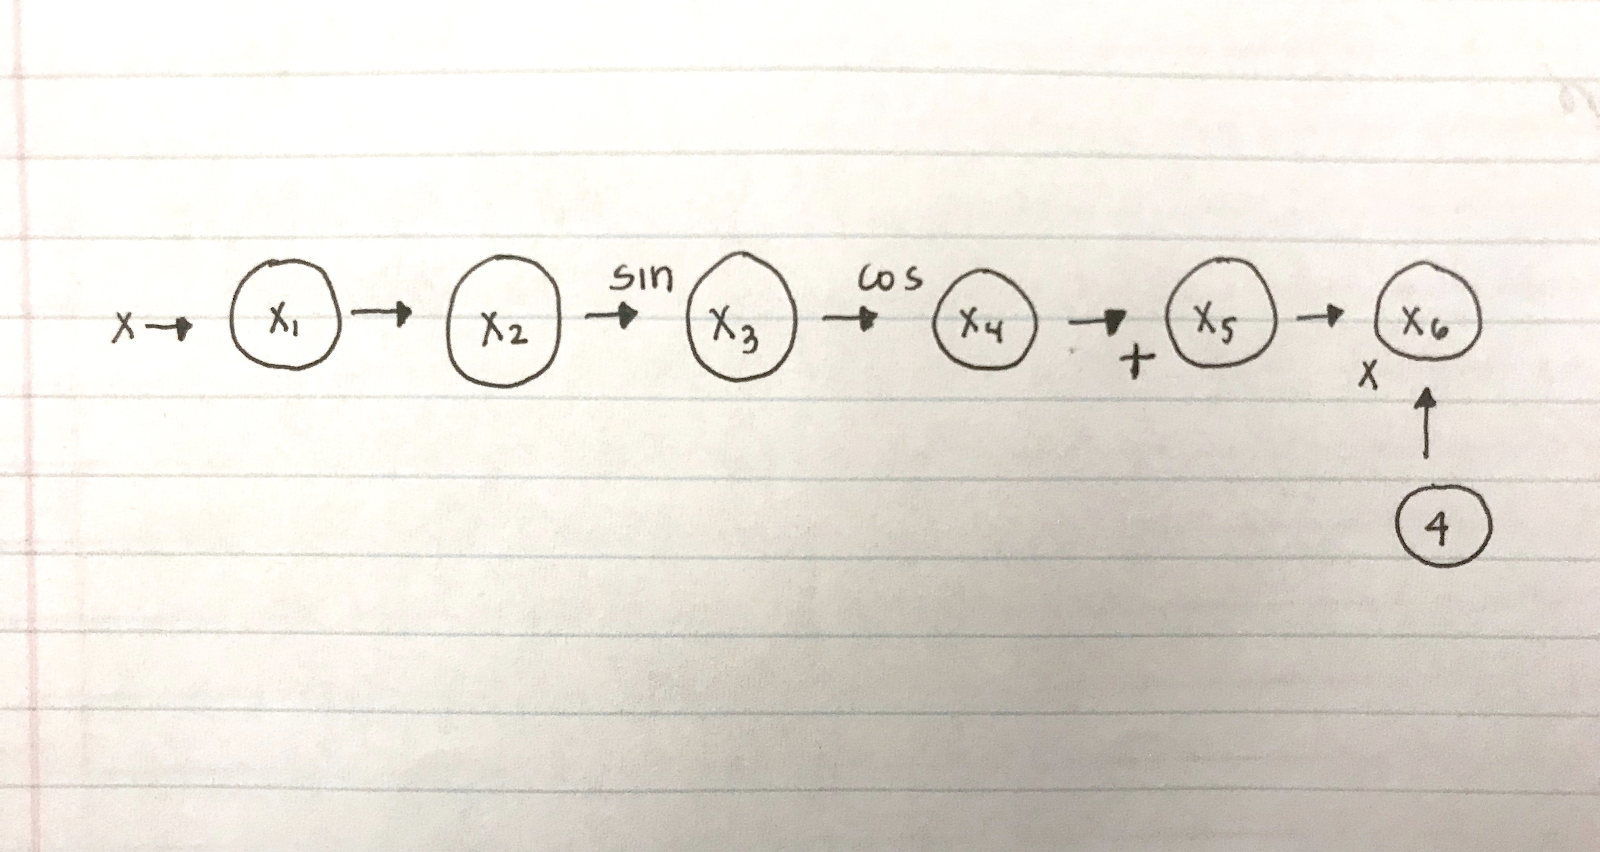
 
The forward mode can be simplified by utilizing another important component of automatic differentiation: dual numbers. Dual numbers are a type of number that uses  and allows for simultaneously automatically differentiating a function while also evaluating the value of the function. 
The forward mode is efficient and straight- forward because it is able to compute all the derivatives in terms of one input with just one forward pass.
### Reverse mode
In the backward mode, a forward pass creates the evaluation trace and indicates the partial derivatives at each step, but does not find the values of the partial derivatives. At the end of this process, the final node’s derivative is evaluated by using an arbitrary seed. Then, the values of the partial derivatives that constitute the end node’s derivative are found by performing a backward pass through the tree to get all the values. 
During both the forward and backward modes, all intermediate variables are evaluated, and their values are stored; these steps can be represented in a table, and further visualized in a computational graph. The graph (and table) essentially outlines this repeated chain rule process; it also serves as the basis of the logic behind our automatic differentiation software library.

### Jacobian product
Auto differentiation can take in a vector of input functions with multiple variables. In this case, the autodifferentiation algorithm returns the Jacobian Product matrix which is just a matrix where each row represents the partial derivatives of the variables of a function within the vector. If the vector has m functions then the Jacobian product will have m rows. If the functions contain n variables, the Jacobian will contain n columns. The Jacobian product matrix is handy in first order derivative applications in the sciences when you are dealing with lots of different systems (functions) and unkowns in the systems (variables). We will see an application of this in the RNA velocity package we will be building. 

### Application of AD
AD can be applied to many branches of computational science, ranging in areas from population dynamics to political dynamical systems. Calculating the exact jacobian of a given function, AD provides important insight into the interactions between the variables in a dynamical system (ie. predator, prey populations), as well as a variable’s long term behavior over time (such as predator population in the absence of prey, competition food source model where a species drives another out).


## How to use

This library provides an easy way to automatically differentiate arbritrarily complex expressions that consist of these elementary functions.

- sin
- cos
- tan
- exp
- powers
- multiplication
- division
- addition
- subtraction
- negation

How this library differentiates is using forward mode automatic differentiation.

To do this one can instantiate autodiff classes, which hold a value and a first order derivative value. We can combine them using operations to arrive at derivative evaluations. 

Note: this version only intakes single functions with single variable inputs. The final product will intake vectors of functions with multiple inputs to return jacobian product matrices.

### Getting setup

Installing the library is easy. Just clone the repository using:

git clone https://github.com/Topcoder-Kitty-ML/cs207-FinalProject.git


Then create a virtual environment from the requirements.txt file. Using the following command:
    
1. cd to the directory where requirements.txt is located
2. activate your virtualenv (see how to do so here according to your OS: https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/26/python-virtual-env/)
3. run: ```pip install -r requirements.txt``` in your shell

Then import autodiff_module as follows:

In [2]:
from autodiff_module import *

### Methods and examples

The way which the package can differentiate automatically is through the instatiation of an autodiff object.

The autodiff object takes an input value. 

It can then be modified and combined with whatever elemental functions / operations listed above. At each modification, the value of the object and the derivative of the object is updated. These are attributes of the objects which can be accessed.

For example:

In [5]:
a = 1
x = autodiff(a)

print("The value of x is:", x.val)
print("The derivative of x is:", x.der)

The value of x is: 1
The derivative of x is: 1


We can then combine two objects together and get their values and derivatives using the mathematical operators:

1. subtraction -
2. addition +
3. division /
4. multiplication *
5. power **
6. unary negation -()

Here we demo the + operator:

In [11]:
a = 1
x = autodiff(a)
b = 2
two_x = autodiff(a)*2

h = x+two_x

print("The value of x+2x is:", h.val)
print("The derivative of x+2x is:", h.der)

The value of x+2x is: 3
The derivative of x+2x is: 3


We can also apply trigonometric and exp functions to autodiff objects.

The available functions are:

1. sine ```sin(x)```
2. cosine ```cos(x)```
3. tan ```tan(x)```
4. $e^x$ ```exponential(x)```

Here we demo the sine function by applying it to the x+y function we created above:

    

In [12]:
j = sin(h)

print("The value of sin(x+2x) is:", j.val)
print("The derivative of sin(x+2x) is:", j.der)

The value of sin(x+2x) is: 0.1411200080598672
The derivative of sin(x+2x) is: -2.9699774898013365


Note that the "jacobian product" in this case is ```j.der```. It is a scalar value since we are only doing single input single functions in this iteration. In the next iteration we will have a class that intakes a vector of autodiff objects representing functions with multiple inputs.

We can furthere complicate this by exponentiating:

In [14]:
g = exponential(j)

print("The value of exp(sin(x+2x)) is:", g.val)
print("The derivative of exp(sin(x+2x)) is:", g.der)

The value of exp(sin(x+2x)) is: 1.151562836514535
The derivative of exp(sin(x+2x)) is: -3.4201157025399453


The following code indicates a sample example of how we use our autodiff object to solve for the roots of a highly complex equation. We define the function we want to solve in the function 'function_to_optimize', as the 'func' equation.

The optimize_and_get_root function will then perform newton's method to solve for the roo, after getting the initial value (initial_val = 3) in this case. With that, we can solve for the root as indicated below.

In [4]:
from autodiff_module import *


def function_to_optimize(x_val = 2):
	# Define the x
	x = autodiff(x_val)

	# ==== Define you function here!!!! =====
	func = sin(x) - x * x * cos(x) - 3 + tan(2 * x)

	return func


def optimize_and_get_root(initial_val, \
	learning_rate=0.1, stopping_threshold = 10 ** (-6)):
	new_x = initial_val
	f_val = ""
	f_der = ""
	while True:
		curr_x = new_x
		f = function_to_optimize(x_val = curr_x)
		new_x = curr_x - learning_rate * float(f.val / f.der)
		f_val = f.val
		f_der = f.der
		if abs(curr_x - new_x) < stopping_threshold:
			break
	return new_x, f_val, f_der



reqr_func = function_to_optimize(x_val=2)
x_soln, f_val, f_der = optimize_and_get_root(3)


print("Optimal root: %s" %x_soln)
print("Function val: %s" %f_val)
print("Function derivative: %s" %f_der)


Optimal root: 4.001159285318255
Function val: 0.0009368339960440508
Function derivative: 99.11762006493832


## Software organization

Our implentation philosphy was to create an object such that all the elemental functions and constants could be arbritrarily combined and nested for differentiation.

We overloaded our operator methods in a generic module:

- ```dummy.py```: this defines our dummy class where any specialized classes like a linear, sine, or cos class were reduced to just value and derivative attributes such that we could use our overloaded operators. +, -, /, * and ** were defined according to to the following differentiation rules: chain rule, generalized power rule, quotient rule and product rule.

We created specialized classes in the following modules that inherited from dummy:

- ```trigo_exp.py```: exponential, sin, cos, tan classes were defined here.
- ```linear.py```: the linear case was defined here such at alpha + beta*x could be differentiated (this was created for our homework and served as a template for the rest of the classes)

A generic script imports all the necessary modules from above so the user only needs to import this module to get everything to work:

- ```autodiff_module.py```

We created a class to handle taking in a vector of autodiff objects and producing a jacobian product matrix:

- ```vector_jacobian.py```: This is still a work in progress. The scope of this iteration is just taking in a scalar input and single function.

We then created a testing suite:

- ```test_ad.py```: tests dummy, trigo_exp, linear, and vector_jacobian modules on all methods and error handling. 
- ```test_error.py```: conducts further tests on error handling not included in test_ad.py

The test suite is run through pytest and called through Travis CI using the travis yml file - it sends a report to codecov for code coverage.

The driver script is:

- ```driver_root_solving.py``` This solves for roots using our package according to newton's method

Installation:

In this iteration, the user is given instructions to download the library through github and create a virtual environment directly. In the final iteration we will be building the package and uploading to Anaconda cloud for distribution. How this is done is by first installing the anaconda client in a local machine, building the package using ```conda build``` from files cloned from the repository and then uploading to an anaconda path defined by our team's anaconda login. We plan to follow the instructions here: https://docs.anaconda.com/anaconda-cloud/user-guide/tasks/work-with-packages/

## Implementation

We wanted to keep our implementation lightweight. Therefore, we do not use any imports except python's standard math library for our single function, single input use case. In our jacobian vector product use case, we will use numpy.

The core data structures are basically our autodiff class which has at its base, a scalar value attribute and a scalar derivative attribute. This can be combined or taken in by a more specialized class that differentiates specialized mathematical functions like sine, cosine, exp, etc. We have explained how this works based on the software organization above. Given this data structure, we can arbritrarily combine objects to represent extremely complex mathematical functions.

In our jacobian product matrix we will utilze arrays to take care of multiple inputs.

Our core classes are:
- autodiff/dummy: these are our generic class where we overloaded our multiplication, addition, subtraction, power and division methods)
- trigo_exp: this class inherits from the more generic classes above and deals with differentiating sine, cosine, tan, exp

The important attributes in our classes are:
.val = value
.der = derivative

The external dependencies are:
- math
- numpy

Elementary functions covered: 

- sin
- cos
- tan
- exp
- powers
- multiplication
- division
- addition
- subtraction
- negation


## Future features

Next, we’d like to expand on what we currently have by implementing RNA_velocity, a new module that can help us better understand RNA velocity, or the time derivative of the gene expression state, which can be estimated by distinguishing between the spliced and unspliced mRNAs products from single cell RNA sequencing. These are also our $s$ and $u$ variables in the differential equation that calculates RNA velocity, respectively. Motivated by the recent paper, RNA velocity of single cells (Manno, et. al), we’re interested in this topic as the study of RNA velocity can give us important insight in predicting the future state of single cells on an hours time- scale, which further serves as a tool in analyzing time dependent phenomena such as tissue regeneration, and more broadly drive advances in developmental lineages and cellular dynamics.
The differential equation that calculates RNA velocity is:
\begin{align}
\dot{u} & = \alpha  - \beta  u \\
\dot{s} & = u - \gamma s \\
\end{align}
where  $\alpha$ is the time dependent rate of transcription, $\beta$ the rate of splicing, which will be set to 1 in order to measure all rates in units of the splicing rate, and $\gamma$, the rate of degradation. 
We plan to have our module RNA_velocity call on our existing AutoDiff package and produce plots for RNA velocity. To allow for user interaction, we also plan to build a user friendly interface where the user will be able to input their chosen parameters $\alpha$ and $\gamma$ for their desired plot. There will also be the option to download the plot. The only constraint on the parameters chosen by the user is that it should be a real integer or float.
We believe that our primary challenges for this feature will be packaging, connecting our script to the website we build, and being able to create an interface that will be both functional and user-friendly.


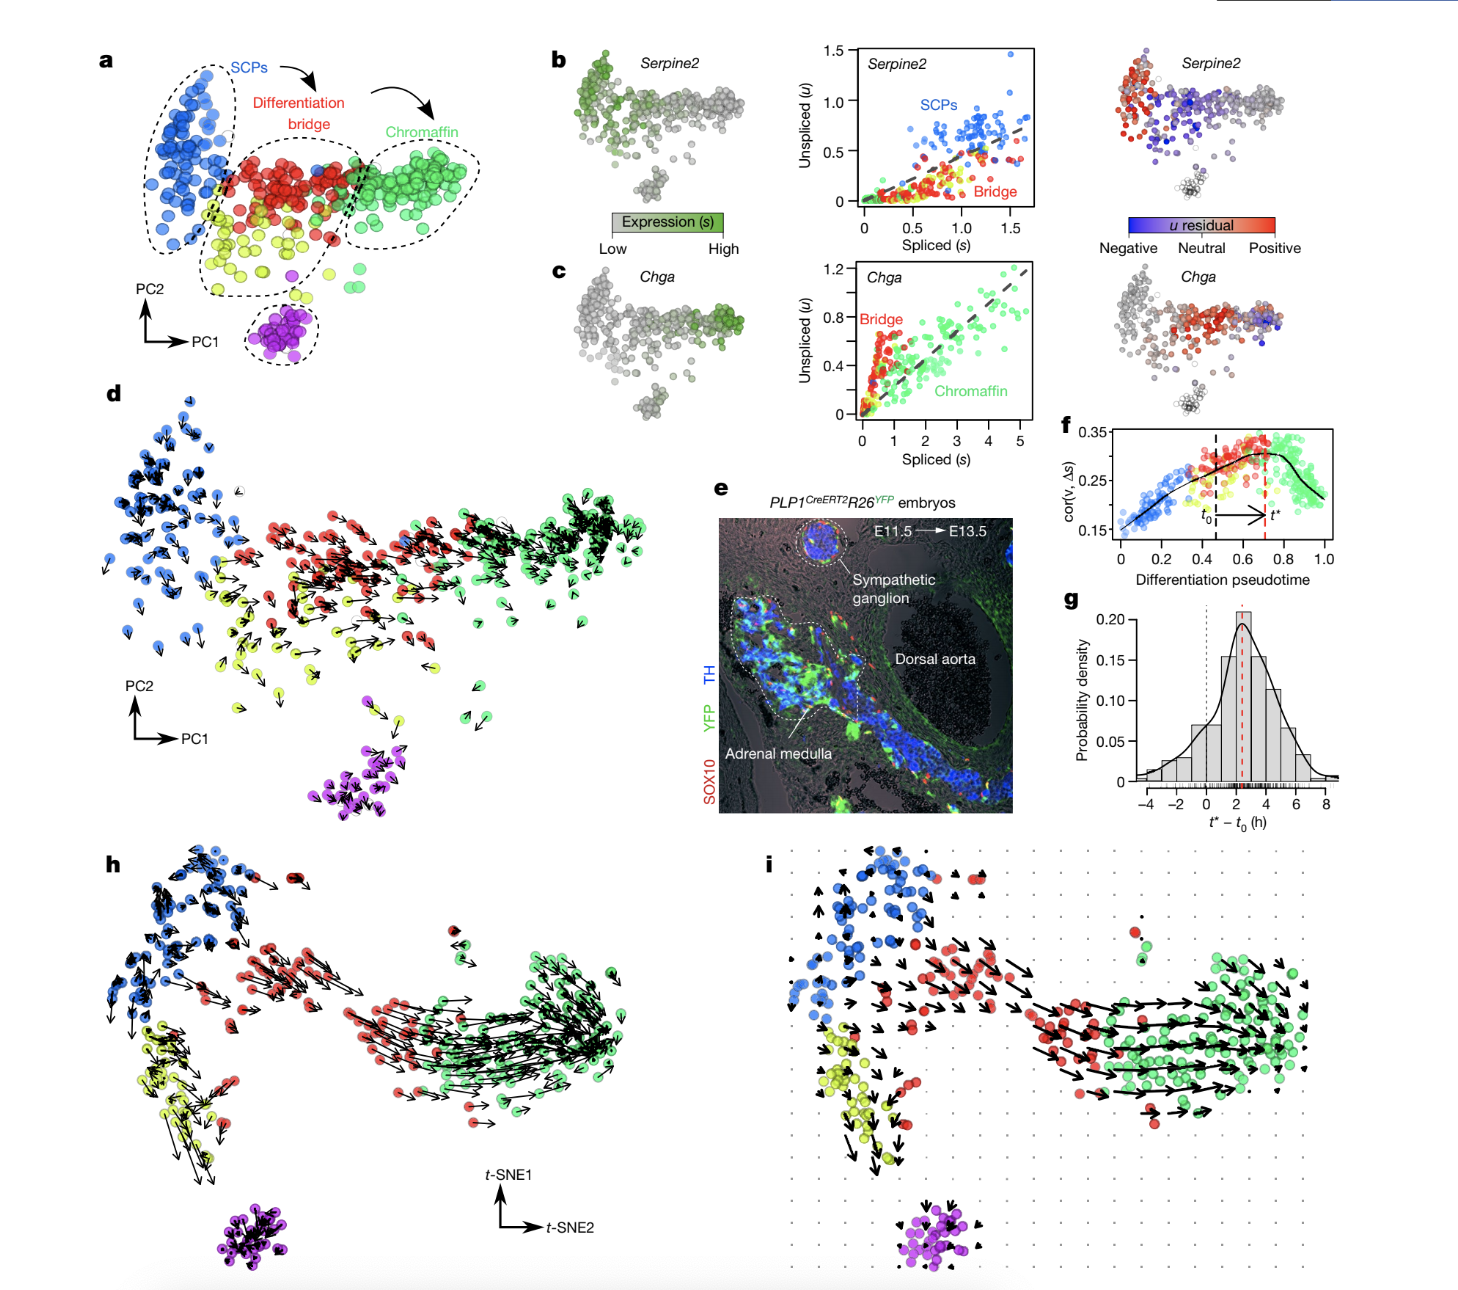